# FOOOF Ratios + Trial by Trial variance analysis

This notebook explores the relationship between parameterized ratios and age.

In [1]:
import pandas as pd
import csv

import mne

# Import custom project code
import sys
sys.path.append('../bratios')
from ratios import *
from analysis import *
from settings import *
from plot import *

### Get data for all blocks (trials)

In [2]:
# Read datafile with dataset information
data = pd.read_csv("../data/eeg/metadata/MIPDB_PublicFile.csv")

In [3]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../data/eeg/metadata/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

In [4]:
# Get the list of all channels
all_chans = mne.pick_channels(montage.ch_names, [])

In [11]:
dfs = []
# Compute Dataframes
# for i in range(1,5):
#     df = get_all_data(data, all_chans, i)
#     df.to_csv("../dat/ChildMind/spectral_measures_dataframe_"+str(i)+".csv")
#     dfs.append(df)   

# Load Dataframes
for i in range(1,5):
    curr_df = pd.read_csv("../dat/ChildMind/spectral_measures_dataframe_"+str(i)+".csv")
    dfs.append(curr_df)

## Fooof ratio correlation with age

In [12]:
def fooof_ratio_corr(dfs, ratio_type, corr_func):
    """ Finds the correlation between fooof ratio and age
        Where fooof ratio := power at center frequency of most salient oscillation
        of high band / power at center frequency of most salient oscillation
        of low band.
    
    Parameters
    ----------
    dfs : list of dataframes
    ratio_type : sting
        Which bands to use in calculating fooof ratio
    corr_func:
        Function to calculate correlation
        
    Return
    ------
    Mean of correlations.
    """
    
    corrs =np.zeros(len(dfs))
    for ind, curr_df in enumerate(dfs):
    
        ratio_type = ratio_type.upper()

        numer = get_wave_params(ratio_type[0])[1]
        denom = get_wave_params(ratio_type[1])[1]

        fooof_ratios = curr_df[numer]/curr_df[denom]

        curr_corr = corr_func(curr_df["Age"], fooof_ratios)[0]

        corrs[ind] = curr_corr

        return np.mean(corrs)

In [13]:
fooof_ratio_corr(dfs,"tbr", nan_corr_spearman)

-0.040623096301554196

In [14]:
fooof_ratio_corr(dfs,"abr", nan_corr_spearman)

-0.02524293954137392

In [15]:
fooof_ratio_corr(dfs, "tar", nan_corr_spearman)

-0.026881795325386773

# Trial by Trial Basis

This section explores the relationship between band ratios and the aperidic exponent across trials.

In [16]:
def get_ratio_ap_var(dfs, ratio_type, corr_func):
    """ Describes the stability of correlation between ratio measures 
        and aperiodic exponent.
        
        Parameters
        ----------
        dfs : list of dataframes
        ratio_type : sting
            Which bands to use in calculating fooof ratio
        corr_func:
            Function to calculate correlation

        Outputs
        ------
        Variance of correlations.
    """
    corrs = []
    for curr_df in dfs:
        curr_corr = corr_func(curr_df["Exp"],curr_df[ratio_type])
        #print(curr_corr)
        if curr_corr[1] <.05:
            corrs.append(curr_corr[0])
    print("variance: ",np.var(corrs))
    
    plt.title(ratio_type)
    plt.xlabel("trial")
    plt.ylabel("corr")
    plt.plot(corrs)

variance:  0.00016710815459686825


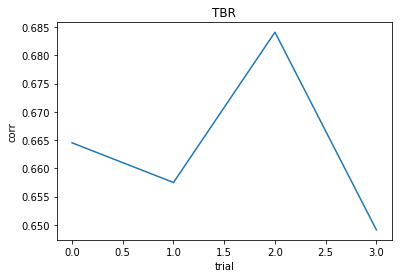

In [17]:
get_ratio_ap_var(dfs,"TBR", nan_corr_spearman)

variance:  0.0016232461646974164


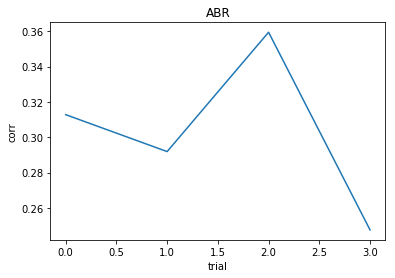

In [18]:
get_ratio_ap_var(dfs,"ABR", nan_corr_spearman)

variance:  0.00028702984652289926


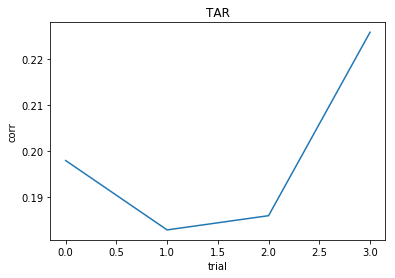

In [19]:
get_ratio_ap_var(dfs,"TAR", nan_corr_spearman)